In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)


In [3]:
heart_data = pd.read_csv("heart_disease_data.csv")

print(heart_data.shape)
heart_data.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# separate features and target
X = heart_data.drop(columns=["target"])
y = heart_data["target"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Features shape: (303, 13)
Target shape: (303,)
Train shape: (242, 13) (242,)
Test shape: (61, 13) (61,)


In [5]:
# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train_scaled, y_train)

# predictions on test data
y_pred_lr = log_reg.predict(X_test_scaled)

# evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression:")
print(f"Accuracy : {accuracy_lr:.3f}")
print(f"Precision: {precision_lr:.3f}")
print(f"Recall   : {recall_lr:.3f}")
print(f"F1-score : {f1_lr:.3f}")


Logistic Regression:
Accuracy : 0.803
Precision: 0.769
Recall   : 0.909
F1-score : 0.833


In [6]:
# Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_clf.fit(X_train_scaled, y_train)

y_pred_rf = rf_clf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = f1_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy : {accuracy_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall   : {recall_rf:.3f}")
print(f"F1-score : {f1_rf:.3f}")


Random Forest:
Accuracy : 0.820
Precision: 0.762
Recall   : 0.853
F1-score : 0.853


In [7]:
print("Heart disease models (test set):")
print(f"LogReg - Acc: {accuracy_lr:.3f}, F1: {f1_lr:.3f}")
print(f"RF     - Acc: {accuracy_rf:.3f}, F1: {f1_rf:.3f}")


Heart disease models (test set):
LogReg - Acc: 0.803, F1: 0.833
RF     - Acc: 0.820, F1: 0.853


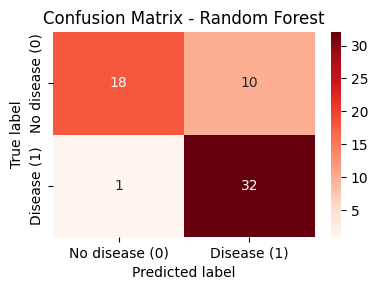

In [8]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=["No disease (0)", "Disease (1)"],
    yticklabels=["No disease (0)", "Disease (1)"]
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()
